In [26]:
import yfinance as yf
import os
import pandas as pd

In [27]:
rms_ticker = yf.Ticker("RMS.PA")

In [28]:
    rms = rms_ticker.history(period="max")


In [16]:
rms

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03 00:00:00+01:00,37.438446,37.689712,36.433388,36.961044,16395,0.0,0.0
2000-01-04 00:00:00+01:00,36.760036,36.760036,34.322768,34.699665,33063,0.0,0.0
2000-01-05 00:00:00+01:00,33.920747,33.920747,31.533731,32.161892,55344,0.0,0.0
2000-01-06 00:00:00+01:00,32.161893,32.161893,31.408098,31.408098,97941,0.0,0.0
2000-01-07 00:00:00+01:00,32.161877,33.418201,31.659350,33.418201,131712,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-12 00:00:00+02:00,1919.199951,1962.800049,1908.000000,1948.599976,51015,0.0,0.0
2023-07-13 00:00:00+02:00,1959.400024,1980.000000,1949.800049,1964.800049,44326,0.0,0.0
2023-07-14 00:00:00+02:00,1955.000000,2000.000000,1953.599976,1996.199951,42767,0.0,0.0


In [3]:
if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    rms = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

In [29]:
rms.index = rms.index.tz_localize(None)

In [30]:
del rms["Dividends"]
del rms["Stock Splits"]

In [31]:
rms.columns = [c.lower() for c in rms.columns]

<Axes: xlabel='Date'>

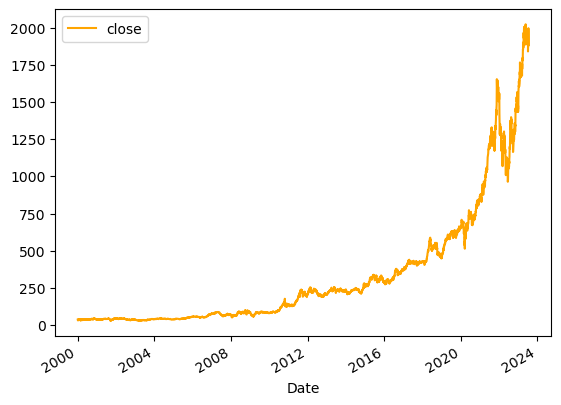

In [32]:
rms.plot.line(y="close", use_index=True, color='orange')

In [33]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [22]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,1.900000,-0.039482,0.347778
2009-04-07,1.933333,-0.065284,0.364444
2009-04-08,2.266667,-0.063595,0.377778
2009-04-09,2.266667,-0.063595,0.377778
2009-04-10,2.200000,-0.092396,0.377778
...,...,...,...
2023-07-15,0.500000,-0.060993,0.138889
2023-07-16,0.533333,-0.027728,0.138889
2023-07-17,0.533333,-0.027728,0.138889
2023-07-18,0.533333,-0.027728,0.138889


In [34]:
rms = rms.merge(wiki, left_index=True, right_index=True)

In [35]:
rms["tomorrow"] = rms["close"].shift(-1)

In [36]:
rms["target"] = (rms["tomorrow"] > rms["close"]).astype(int)

In [37]:
rms["target"].value_counts()

1    1959
0    1697
Name: target, dtype: int64

In [38]:
rms

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2009-04-06,74.705460,76.358933,74.342291,75.675323,206731,1.900000,-0.039482,0.347778,73.466400,0
2009-04-07,76.393102,76.427284,72.821255,73.466400,217572,1.933333,-0.065284,0.364444,73.944939,1
2009-04-08,72.406820,74.026112,71.778755,73.944939,117884,2.266667,-0.063595,0.377778,77.461227,1
2009-04-09,72.821244,77.845754,72.821244,77.461227,158236,2.266667,-0.063595,0.377778,77.290344,0
2009-04-14,77.461250,78.751561,76.059856,77.290344,159526,2.300000,-0.065311,0.325397,76.901543,0
...,...,...,...,...,...,...,...,...,...,...
2023-07-12,1919.199951,1962.800049,1908.000000,1948.599976,51015,0.533333,-0.036056,0.138889,1964.800049,1
2023-07-13,1959.400024,1980.000000,1949.800049,1964.800049,44326,0.500000,-0.060993,0.138889,1996.199951,1
2023-07-14,1955.000000,2000.000000,1953.599976,1996.199951,42767,0.500000,-0.060993,0.138889,1912.199951,0
2023-07-17,1931.400024,1951.000000,1890.599976,1912.199951,76729,0.533333,-0.027728,0.138889,1882.199951,0


In [39]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = rms.iloc[:-200]
test = rms.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [40]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.575

In [41]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [43]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [45]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(rms, model, predictors)

In [46]:
predictions["predictions"].value_counts()

0    1837
1     724
Name: predictions, dtype: int64

In [47]:
precision_score(predictions["target"], predictions["predictions"])

0.537292817679558

In [23]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [24]:
btc, new_predictors = compute_rolling(btc.copy())

In [25]:
predictions = backtest(btc, model, new_predictors)

In [26]:
precision_score(predictions["target"], predictions["predictions"])

0.5413533834586466

In [48]:
predictions

,target,predictions
2013-07-18,0,0
2013-07-19,1,0
2013-07-22,0,0
2013-07-23,0,0
2013-07-24,0,0
...,...,...
2023-07-12,1,1
2023-07-13,1,0
2023-07-14,0,0
2023-07-17,0,0


In [60]:
def compute_rolling(rms):
    horizons = [2,7,60,365]
    new_predictors = ["close","sentiment","neg_sentiment"]
    
    for horizon in horizons:
        rolling_averages = rms.rolling(horizon, min_periods=1).mean()
        
        ratio_column=f"close_ratio_{horizon}"
        rms[ratio_column] = rms["close"] / rolling_averages["close"]
        
        edit_column=f"edit_{horizon}"
        rms[edit_column] = rolling_averages["edit_count"]
        
        rolling = rms.rolling(horizon, closed="left", min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        rms[trend_column]=rolling["target"]
        
        new_predictors += [ratio_column, trend_column, edit_column]
    return rms, new_predictors

In [61]:
rms, new_predictors = compute_rolling(rms.copy())

In [62]:
rms

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2009-04-06,74.705460,76.358933,74.342291,75.675323,206731,1.900000,-0.039482,0.347778,73.466400,0,...,NaN,1.000000,1.900000,NaN,1.000000,1.900000,NaN,1.000000,1.900000,NaN
2009-04-07,76.393102,76.427284,72.821255,73.466400,217572,1.933333,-0.065284,0.364444,73.944939,1,...,0.0,0.985189,1.916667,0.000000,0.985189,1.916667,0.000000,0.985189,1.916667,0.000000
2009-04-08,72.406820,74.026112,71.778755,73.944939,117884,2.266667,-0.063595,0.377778,77.461227,1,...,0.5,0.994389,2.033333,0.500000,0.994389,2.033333,0.500000,0.994389,2.033333,0.500000
2009-04-09,72.821244,77.845754,72.821244,77.461227,158236,2.266667,-0.063595,0.377778,77.290344,0,...,1.0,1.030934,2.091667,0.666667,1.030934,2.091667,0.666667,1.030934,2.091667,0.666667
2009-04-14,77.461250,78.751561,76.059856,77.290344,159526,2.300000,-0.065311,0.325397,76.901543,0,...,0.5,1.022797,2.133333,0.500000,1.022797,2.133333,0.500000,1.022797,2.133333,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-12,1919.199951,1962.800049,1908.000000,1948.599976,51015,0.533333,-0.036056,0.138889,1964.800049,1,...,1.0,1.023532,0.609524,0.571429,0.998880,0.424444,0.516667,1.339210,0.414886,0.528767
2023-07-13,1959.400024,1980.000000,1949.800049,1964.800049,44326,0.500000,-0.060993,0.138889,1996.199951,1,...,1.0,1.031082,0.609524,0.714286,1.007167,0.420556,0.516667,1.348536,0.415160,0.531507
2023-07-14,1955.000000,2000.000000,1953.599976,1996.199951,42767,0.500000,-0.060993,0.138889,1912.199951,0,...,1.0,1.042589,0.595238,0.857143,1.022902,0.416667,0.533333,1.368233,0.415434,0.531507
2023-07-17,1931.400024,1951.000000,1890.599976,1912.199951,76729,0.533333,-0.027728,0.138889,1882.199951,0,...,0.5,0.993365,0.576190,0.857143,0.980483,0.413333,0.516667,1.308980,0.415799,0.531507


In [64]:
predictons = backtest(rms, model, new_predictors)

In [65]:
precision_score(predictions["target"], predictions["predictions"])

0.537292817679558

In [66]:
predictions

,target,predictions
2013-07-18,0,0
2013-07-19,1,0
2013-07-22,0,0
2013-07-23,0,0
2013-07-24,0,0
...,...,...
2023-07-12,1,1
2023-07-13,1,0
2023-07-14,0,0
2023-07-17,0,0
